In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('bp_syst.csv', sep=',',header=None) #No headers
df.head()

,0,1
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


In [3]:
#As our data doesn't have headers, we can't use the header names to access columns.
#iloc is a convenient way to access data by index
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1]

In [4]:
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

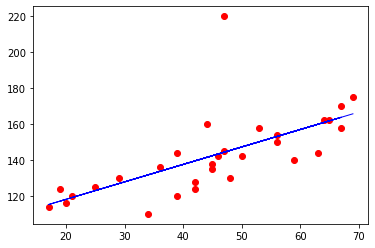

In [5]:
plt.scatter(X, y,  color='red')
plt.plot(X, y_pred, color='blue', linewidth=1)

In [6]:
from sklearn.metrics import mean_squared_error

#We will want to display the results of multiple experiments.
#It makes sense to factor common code into a reusable function.
def display_results(X_test,y_test,reg):
    plt.scatter(X_test, y_test,  color='red')
    plt.plot(X_test, reg.predict(X_test), color='blue', linewidth=1)
    plt.show()#Plot before executing next line of code.
    ##
    print('Intercept: {}'.format(reg.intercept_))
    print('Gradient: {}'.format(reg.coef_[0]))
    print('Coefficient of determination: {}'.format(reg.score(X_test,y_test)))
    print('MSE: {}'.format(mean_squared_error(y_test,reg.predict(X_test))))

Full Dataset


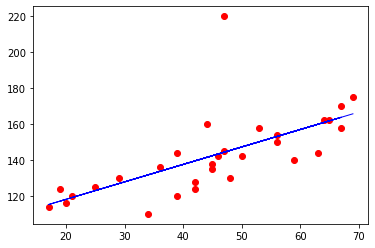

Intercept: 98.71471813821842
Gradient: 0.9708703514427235
Coefficient of determination: 0.43239473192759537
MSE: 279.78146604816936


In [7]:
print('Full Dataset')
display_results(X,y,reg)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)

LinearRegression()

Test Dataset


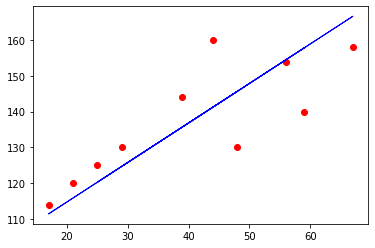

Intercept: 92.56157013378234
Gradient: 1.1061839803207094
Coefficient of determination: 0.5216815893461753
MSE: 113.57670660975069


In [9]:
#Note: we don't have the outlier point in our test dataset.
print('Test Dataset')
display_results(X_test,y_test,reg_train)

Test Dataset With Outlier


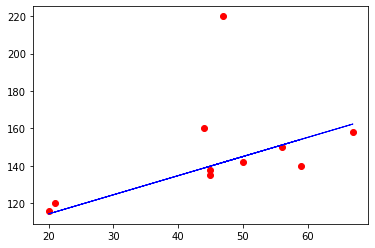

Intercept: 93.82727272727274
Gradient: 1.0227272727272725
Coefficient of determination: 0.10234043560775774
MSE: 683.0201859504132


In [10]:
#If we do have the outlier point in our test set...
#...(which I have achieved by fiddling with the random state. Do NOT try this at home.)...
#...does it affect our results?

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=44)
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)
print('Test Dataset With Outlier')
display_results(X_test,y_test,reg_train)

Why are these differences important?
What are we trying to achieve with regression?
 - Predicting values we have seen?
 - Predicting values we have not yet seen?

Let's start by comparing two models, one simple and one complex, on a training set containing the outlier.

Comparison of linear regressor and MLP on the training data


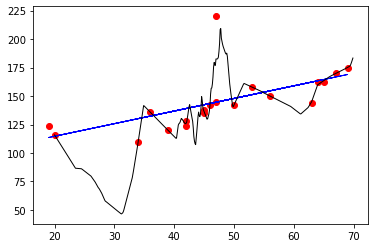

Linear Regressor MSE: 369.0972072771282
MLP MSE: 141.65458834409156


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)

# Our simple model: a linear regressor
reg_train = LinearRegression()
reg_train.fit(X_train, y_train)

#Our more complex model: an MLP
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
#Note: it is VERY important to scale features before passing them to an MLP
#If you don't do this, it will perform very badly.
scaler = StandardScaler()
scaler.fit(X_train) #We create a scaler based on the training data only.
X_train_scaled = scaler.transform(X_train)
# Here we create and train an MLP with a single hidden layer containing 500
# nodes (complex relative to the linear regressor). Some parameters to note:
#  - alpha=0.  This stops the training process penalizing complex models.
#              Useful in this example, but DO NOT DO THIS IN YOUR OWN WORK.
#  - max_iter. The number of iterations of training. You can increase this
#              if your algorithm isn't converging (you will see a warning).
#  - solver.   The algorithm used to train the MLP. Here we have a relatively
#              small dataset, so I have chosen 'lbfgs'. The default value
#              'adam' works better on large datasets.
mlp_reg_train = MLPRegressor(random_state=42,hidden_layer_sizes=(500), alpha=0,max_iter=3000,solver='lbfgs').fit(X_train_scaled, y_train)

# The next two lines just allow us to plot the output of our non-linear model
# without it looking like a complete mess! Note that we are using X_interval
# as an input to our MLP, so need to scale it before it is used USING THE
# SCALER WE TRAINED ON THE TRAINING DATA.
X_interval = np.arange(20,70,0.1).reshape(-1,1)
X_interval_scaled = scaler.transform(X_interval)

print('Comparison of linear regressor and MLP on the training data')
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_train, reg_train.predict(X_train), color='blue', linewidth=1)
plt.plot(X_interval, mlp_reg_train.predict(X_interval_scaled), color='black', linewidth=1)
plt.show()
print('Linear Regressor MSE: {}'.format(mean_squared_error(y_train,reg_train.predict(X_train))))
#Note again that we are scaling the inputs (X_train) before passing them to the MLP
print('MLP MSE: {}'.format(mean_squared_error(y_train,mlp_reg_train.predict(scaler.transform(X_train)))))

Which of these models fits the data best?

Any other observations?

Now let's compare these two models against the (unseeen) test 
data.

Comparison of linear regressor and MLP on the test data


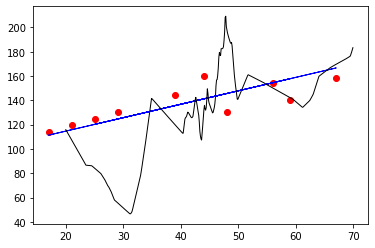

Linear Regressor MSE: 113.57670660975069
MLP MSE: 1417.8257862551338


In [12]:
print('Comparison of linear regressor and MLP on the test data')
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, reg_train.predict(X_test), color='blue', linewidth=1)
plt.plot(X_interval, mlp_reg_train.predict(X_interval_scaled), color='black', linewidth=1)
plt.show()
print('Linear Regressor MSE: {}'.format(mean_squared_error(y_test,reg_train.predict(X_test))))
print('MLP MSE: {}'.format(mean_squared_error(y_test,mlp_reg_train.predict(scaler.transform(X_test)))))

This is an example of **overfitting**. The more complex model has learned the noise in the data, not (just) the underlying trend and so doesn't generalise well to unseen data.

Takeaway messages:
 - never evaluate your model's final performance on data that it has already seen (training data).
   - training performance can still give you useful information though.
   - poor training performance can indicate a model which is badly suited to the problem
   - very low training error can give you an early indication of overfitting
 - if you are using a (potentially) complex model, regularisation (e.g. the alpha term in the MLP) can help avoid overfitting.